In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [2]:
iris_data = pd.read_csv('iris.data',sep=',',names=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','target'])

In [3]:
iris_data.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,target
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In this data we don't have any NaN values so it's pretty easy

In [4]:
print(iris_data.isnull().sum(axis = 0))
print(iris_data.isnull().sum(axis = 1))

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
target                0
dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64


<AxesSubplot:>

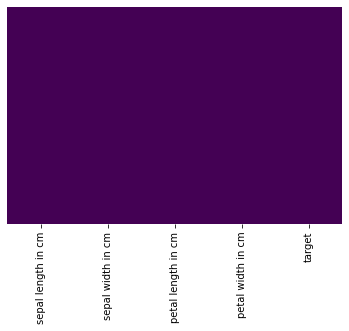

In [5]:
sns.heatmap(iris_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Visualization

<AxesSubplot:>

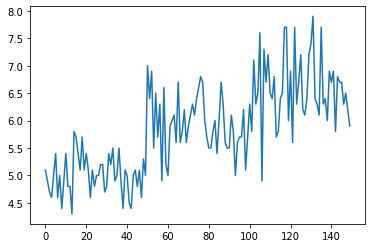

In [6]:
iris_data['sepal length in cm'].plot()

<AxesSubplot:>

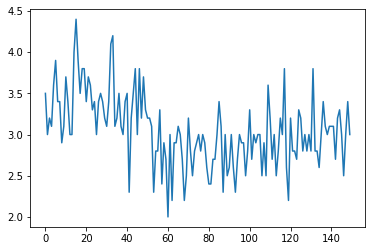

In [7]:
iris_data['sepal width in cm'].plot()

<AxesSubplot:xlabel='target', ylabel='count'>

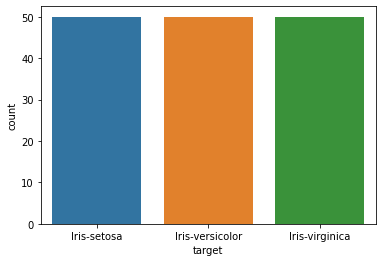

In [8]:
sns.countplot(iris_data['target'],data=iris_data)

### scatterplot for sepal lenght and sepal width 

<AxesSubplot:xlabel='sepal length in cm', ylabel='sepal width in cm'>

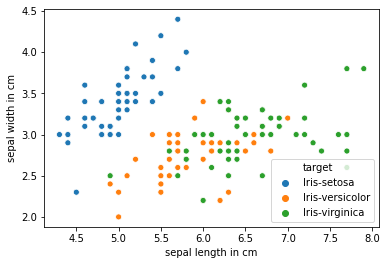

In [9]:
sns.scatterplot(iris_data['sepal length in cm'],iris_data['sepal width in cm'],hue=iris_data['target'])

### scatterplot for petal lenght and petal width

<AxesSubplot:xlabel='petal length in cm', ylabel='petal width in cm'>

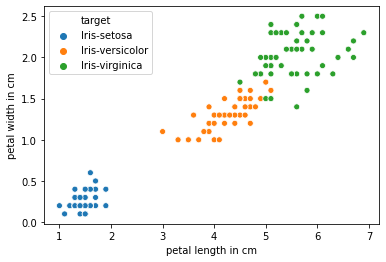

In [10]:
sns.scatterplot(iris_data['petal length in cm'],iris_data['petal width in cm'],hue=iris_data['target'])

### Change Categorical Data into numerical value


In [11]:
data = iris_data

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
data['target'] = le.fit_transform(data['target'])
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

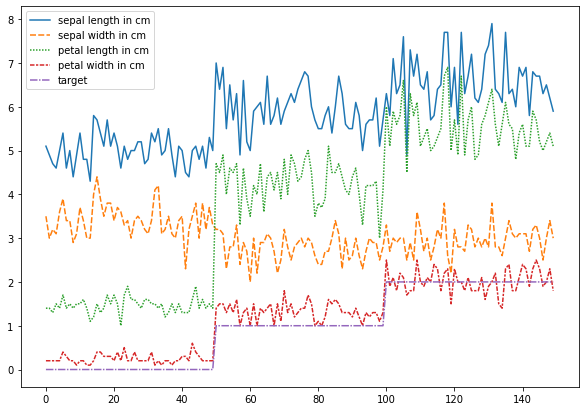

In [15]:
plt.figure(figsize = (10,7))
sns.lineplot(data=data)

### Model Creation

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data.iloc[:,[0,1,2,3]].values

In [18]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
y = data.iloc[:,-1].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(105, 4)
(45, 4)
(105,)
(105,)


## logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
# model.fit(X_test,y_test) 

In [25]:
 pickle.dump(model,open('model_new.pkl','wb'))

In [26]:
model = pickle.load(open('model.pkl','rb'))

C:\Users\SAI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\SAI\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 1, 0,
       2])

In [29]:
# confussion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [30]:
cm

array([[21,  0,  0],
       [ 0,  4,  6],
       [ 0,  0, 14]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [32]:
accuracy

0.8666666666666667

# import pickle library

In [34]:
#pip install pickle

In [36]:
pickle.dump(model,open('model_logistic.pkl','wb'))